In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6
import random
import pprint
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\HARI\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
data=pd.read_csv('georgia.csv',usecols=['date','dissolved_oxygen'])
data=data.set_index('date')
train=data[0:1339]
#train

In [11]:
test=data[1339:]
#test

In [18]:
model = ARIMA(data, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:     D.dissolved_oxygen   No. Observations:                 1602
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 167.731
Method:                       css-mle   S.D. of innovations              0.218
Date:                Tue, 23 Apr 2019   AIC                           -329.462
Time:                        09:02:30   BIC                           -313.325
Sample:                    10-02-2014   HQIC                          -323.471
                         - 02-19-2019                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0015      0.008      0.198      0.843      -0.014       0.017
ma.L1.D.dissolved_oxygen     0.4264      0.023     18.671      0.000       0.382       0.

C:\Users\HARI\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\HARI\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


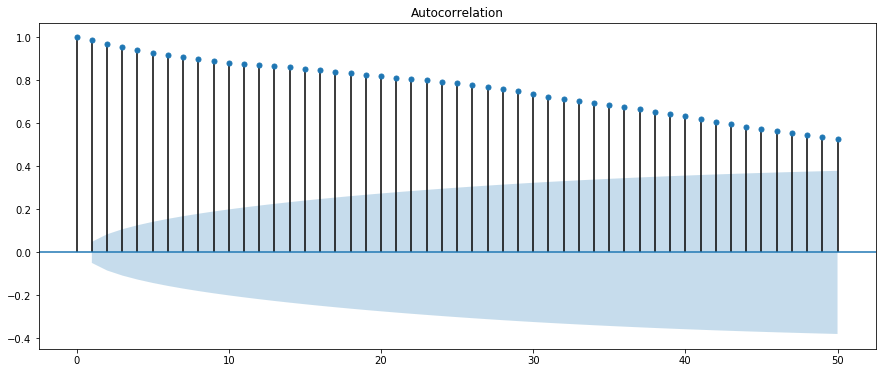

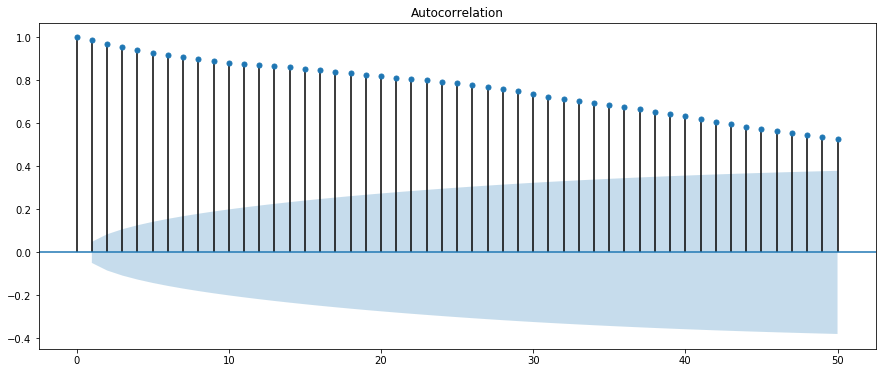

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data,lags=50)
#plt.show()

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
series=pd.read_csv('georgia.csv',usecols=['dissolved_oxygen'])
dec = seasonal_decompose(series)
plt.plot(result)
plt.show()


AttributeError: 'RangeIndex' object has no attribute 'inferred_freq'

C:\Users\HARI\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


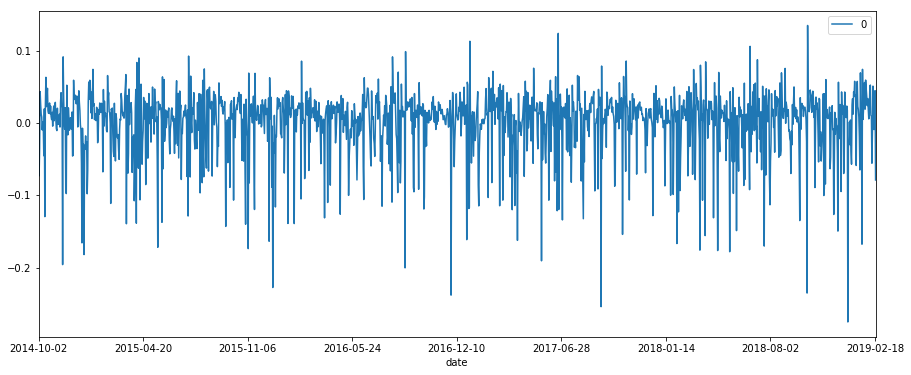

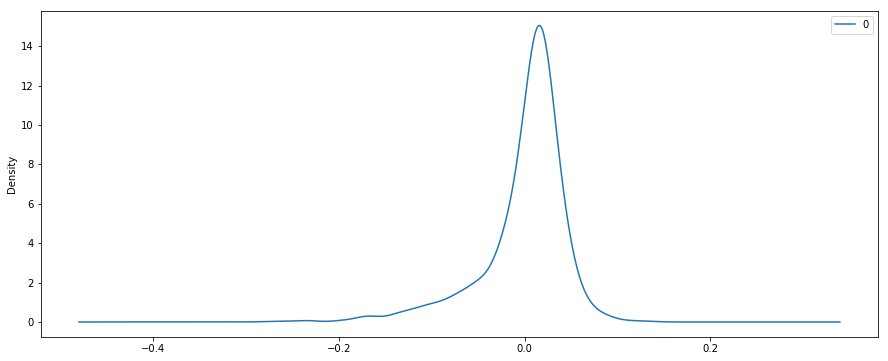

                 0
count  1602.000000
mean     -0.000002
std       0.045398
min      -0.274883
25%      -0.011992
50%       0.010806
75%       0.025042
max       0.134579


In [13]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

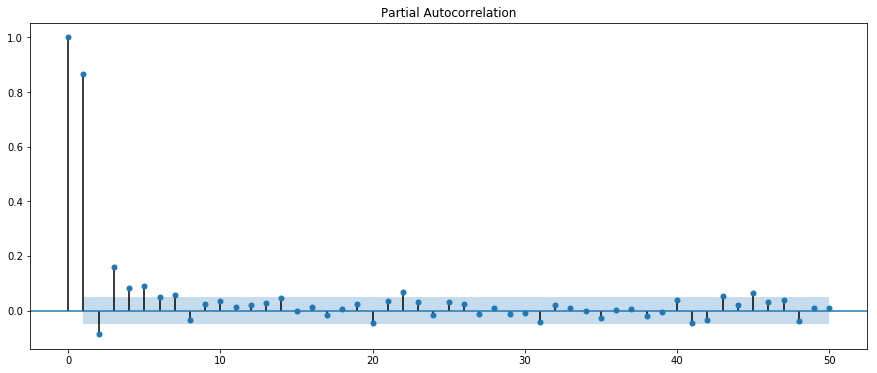

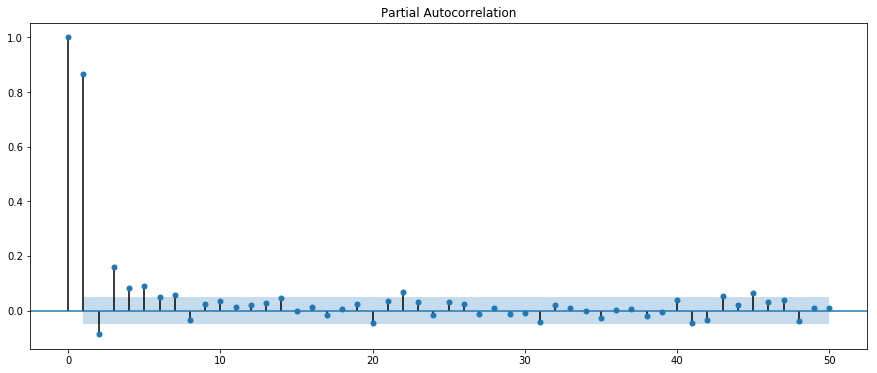

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data,lags=50)

In [48]:
trainValues=train.values
testValues=test.values
training_data=[x for x in trainValues]
predictions=[]
for item in range(len(testValues)):
    model=ARIMA(training_data,order=(0,1,1))
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    predicted=output[0]
    predictions.append(predicted)
    observation=testValues[item]
    training_data.append(observation)
    print('predicted=%f, expected=%f' % (predicted, observation))

C:\Users\HARI\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\HARI\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\HARI\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\HARI\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:136

predicted=6.962926, expected=6.955097
predicted=6.954792, expected=6.907524
predicted=6.905836, expected=6.964335
predicted=6.966200, expected=6.996487
predicted=6.997493, expected=7.025925
predicted=7.026906, expected=7.033031
predicted=7.033258, expected=7.043449
predicted=7.043824, expected=7.030088
predicted=7.029636, expected=6.987118
predicted=6.985637, expected=6.996769
predicted=6.997141, expected=6.975376
predicted=6.974611, expected=6.893892
predicted=6.890976, expected=6.962989
predicted=6.965226, expected=6.907888
predicted=6.906150, expected=6.930247
predicted=6.930869, expected=6.936771
predicted=6.936885, expected=6.960100
predicted=6.960724, expected=6.978123
predicted=6.978599, expected=6.968704
predicted=6.968393, expected=6.992704
predicted=6.993383, expected=7.017164
predicted=7.017855, expected=6.974974
predicted=6.973741, expected=6.874153
predicted=6.870995, expected=6.987591
predicted=6.990350, expected=6.983266
predicted=6.983083, expected=6.937726
predicted=6.

predicted=6.809944, expected=6.764056
predicted=6.762652, expected=6.805934
predicted=6.806938, expected=6.859947
predicted=6.861302, expected=6.878167
predicted=6.878551, expected=6.914844
predicted=6.915803, expected=6.942476
predicted=6.943195, expected=6.981041
predicted=6.982121, expected=6.992535
predicted=6.992828, expected=7.001263
predicted=7.001505, expected=6.913976
predicted=6.911387, expected=6.930402
predicted=6.930885, expected=6.985494
predicted=6.987044, expected=6.999228
predicted=6.999575, expected=6.998573
predicted=6.998537, expected=6.987693
predicted=6.987366, expected=6.953702
predicted=6.952686, expected=6.879398
predicted=6.877095, expected=6.952160
predicted=6.954200, expected=6.988057
predicted=6.989022, expected=6.996465
predicted=6.996673, expected=6.816499
predicted=6.811241, expected=6.890899
predicted=6.892521, expected=6.924932
predicted=6.925619, expected=6.953707
predicted=6.954327, expected=7.001451
predicted=7.002575, expected=7.047871
predicted=7.

Test MSE: 0.003
Test RMSE:0.051


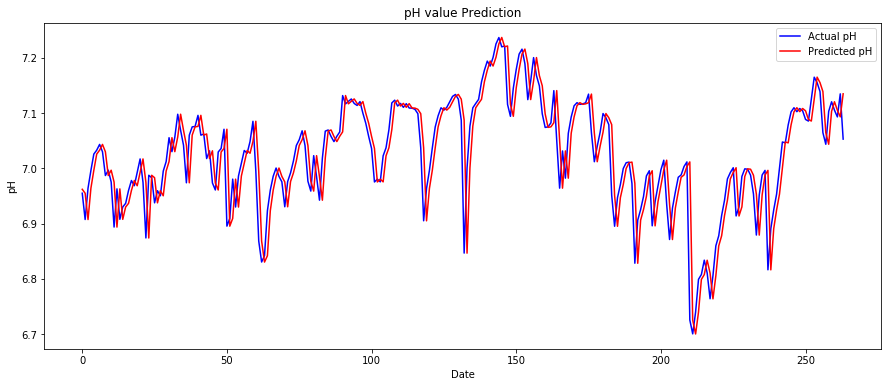

In [46]:
error=mean_squared_error(testValues[0:264],predictions)
print('Test MSE: %.3f' % error)
print('Test RMSE:%.3f'% sqrt(error))
plt.plot(testValues,color='blue', label='Actual pH')
plt.plot(predictions, color='red',label='Predicted pH')
plt.title('pH value Prediction')  
plt.xlabel('Date')  
plt.ylabel('pH')  
plt.legend()  
plt.show()

In [47]:
from sklearn.metrics import r2_score
score=r2_score(testValues,predictions)
score

0.7189185334634527